This notebook establishes how Abbott splits up its energy production between steam and electricity. 
- Steam is always produced first. 100% of steam demand must be met. 
- Whatever is left is turned into electricity. 

Let's look at 2017 data only (we can't use "typical" datasets because the months might not correspond).

In [1]:
import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import platform
pylab.rcParams['figure.figsize'] = (12,9)

In [2]:
path = "./../../data/"
steam17 = read_csv(path+"annual_steam2017.csv")
elgen17 = read_csv(path+"annual_generation2017.csv")

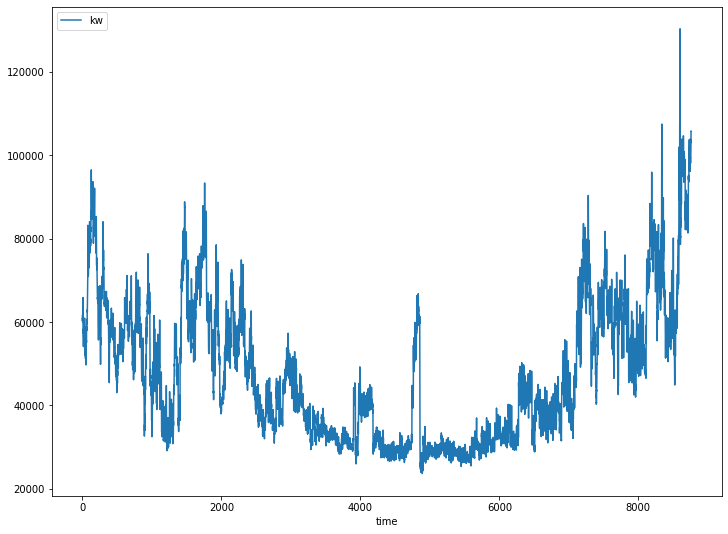

In [3]:
steam17.plot(x='time', y='kw')

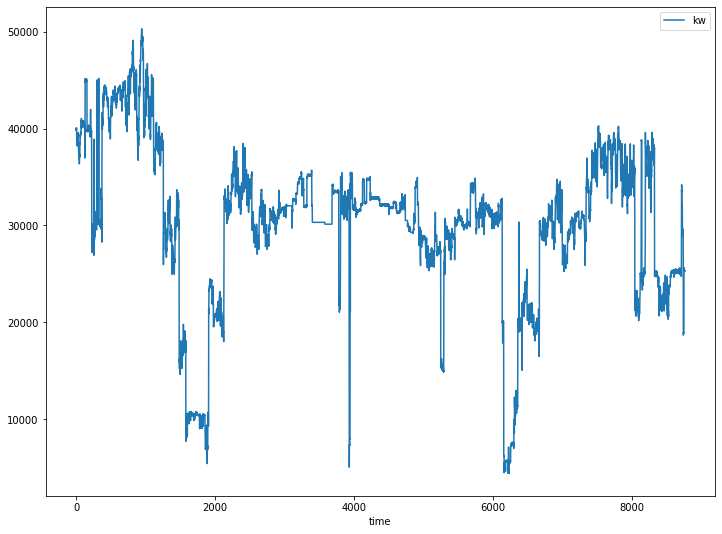

In [4]:
elgen17.plot(x='time', y='kw')

Next we need to to make sure these are in the same units. Electricity generation is in units of KW$_{e}$.
So we should convert to KW$_{th}$ by dividing by the efficiency. I assume efficiency is around 33% ($\eta = 0.33$). 

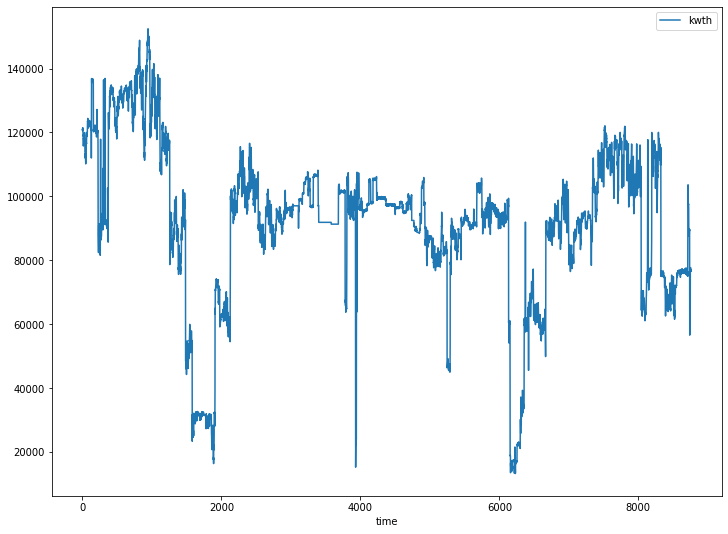

In [5]:
elgen17['kwth'] = elgen17['kw']/0.33
elgen17.plot(x='time', y='kwth')

Next, I am going to create a new dataframe that allows me to calculate the percentage of each output resource.

In [6]:
combined = pd.DataFrame({'time':elgen17['time'], 'kwtot':(elgen17['kwth']+steam17['kw'])})
combined

,time,kwtot
0,0,181667.254305
1,1,181452.320809
2,2,180827.724200
3,3,182556.839702
4,4,181445.443602
...,...,...
8755,8755,180191.063863
8756,8756,179931.164317
8757,8757,180105.645626
8758,8758,182429.970652


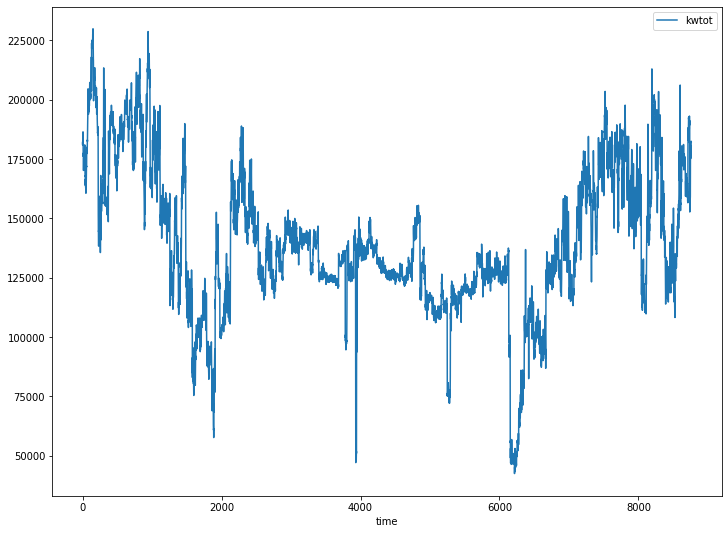

In [7]:
combined.plot(x='time', y='kwtot')

In [8]:
combined['elfrac'] = elgen17['kwth']/combined['kwtot']
combined['stfrac'] = steam17['kw']/combined['kwtot']
combined

,time,kwtot,elfrac,stfrac
0,0,181667.254305,0.665436,0.334564
1,1,181452.320809,0.665740,0.334260
2,2,180827.724200,0.666950,0.333050
3,3,182556.839702,0.662077,0.337923
4,4,181445.443602,0.669189,0.330811
...,...,...,...,...
8755,8755,180191.063863,0.424718,0.575282
8756,8756,179931.164317,0.427520,0.572480
8757,8757,180105.645626,0.425491,0.574509
8758,8758,182429.970652,0.420153,0.579847


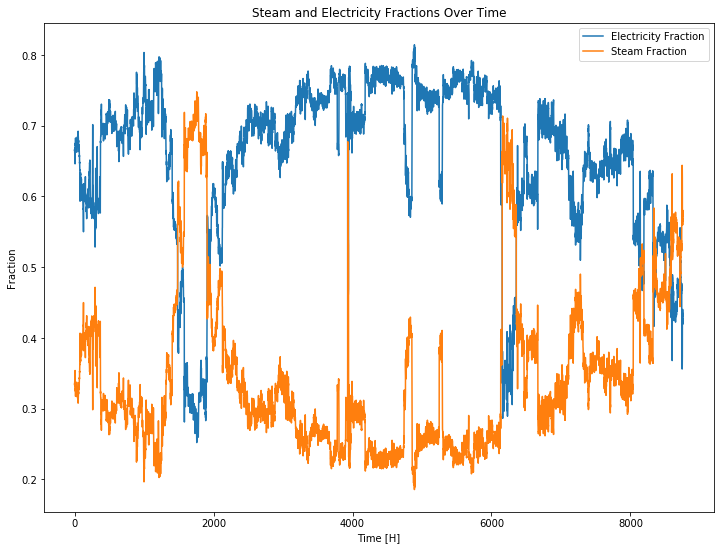

In [9]:
plt.plot(combined['time'],combined['elfrac'], label='Electricity Fraction')
plt.plot(combined['time'],combined['stfrac'], label='Steam Fraction')
plt.legend()
plt.title("Steam and Electricity Fractions Over Time")
plt.xlabel('Time [H]')
plt.ylabel("Fraction")
plt.show()

This will give a **crude** estimate for the general split. This graph is interesting because it shows that when 
the majority of students are off campus, steam usage exceed electricity usage. The first big spike occurs around spring break. Although the beginning of the year suggests this isn't completely true... Anyway, crude estimate.

In [10]:
steam_frac = combined['stfrac'].mean()
elec_frac = combined['elfrac'].mean()

print(f"Average steam fraction is {round(steam_frac*100,2)}%")
print(f"Average electricity fraction is {round(elec_frac*100,2)}%")

Average steam fraction is 34.57%
Average electricity fraction is 65.43%


In [11]:
# total electricity in a year
elgen17['kwth'].sum()/1e6

803.3809242069697

In [12]:
# total steam in a year (in kWh)
steam17['kw'].sum()/1e6

414.70032966375425

In [13]:
803.4*0.975**2

763.7321249999999

In [14]:
425*1.025

435.62499999999994

In [15]:
393.9*0.975

384.05249999999995